In [7]:
!pip install deepface

In [83]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

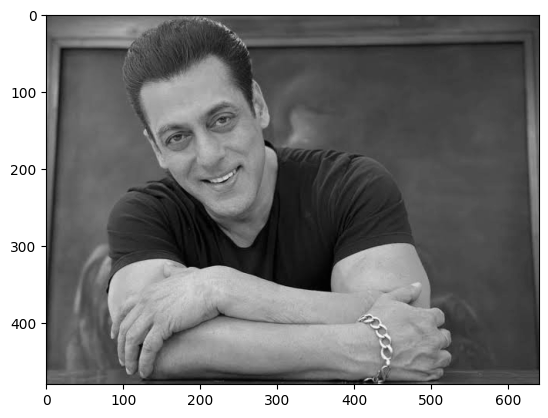

In [102]:
# Input image
image = cv2.imread('Male Image.jpg')
plt.imshow(image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Changed cv2.cvtColorTwoPlaneColor to cv2.cvtColor
plt.imshow(gray, cmap='gray')

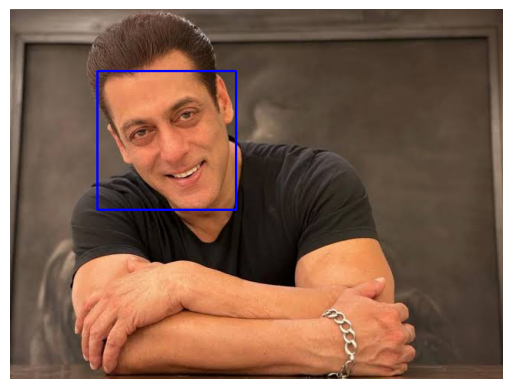

In [103]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [104]:
result = DeepFace.analyze(image, actions = ['age', 'gender'])
print(result)

Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

[{'age': 44, 'region': {'x': 112, 'y': 82, 'w': 178, 'h': 178, 'left_eye': (225, 138), 'right_eye': (169, 159)}, 'face_confidence': 0.95, 'gender': {'Woman': 0.01922550145536661, 'Man': 99.98077750205994}, 'dominant_gender': 'Man'}]


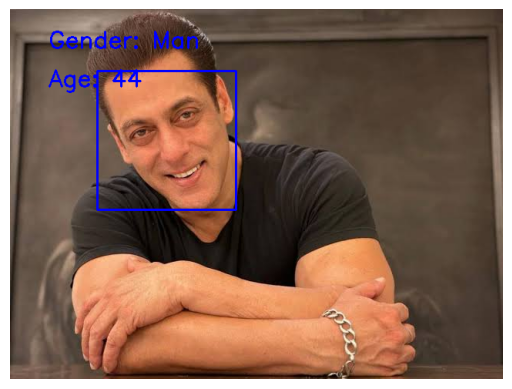

In [105]:
import matplotlib.pyplot as plt
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (255, 0, 0)
thickness = 2

# Get the gender and age from the result
gender = result[0]['dominant_gender']
age = str(int(result[0]['age']))

# Add the gender and age to the image
cv2.putText(image, f"Gender: {gender}", org, font, fontScale, color, thickness)
org = (50, 100)
cv2.putText(image, f"Age: {age}", org, font, fontScale, color, thickness)

# Display the image with gender and age
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
